In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

In [4]:
# Load the datasets
data_1 = pd.read_csv("/Volumes/TwoTeras/0_Experiment_1/Entropy_Results/entropy_log.csv")
data_1["Experiment"] = 1
data_1[['ParticipantID', 'SessionNr']] = data_1['Filename'].str.split('_', expand=True)
data_2 = pd.read_csv("/Volumes/TwoTeras/1_Experiment_2/Entropy_Results/entropy_log.csv")
data_2["Experiment"] = 2
data_2[['ParticipantID', 'SessionNr']] = data_2['Filename'].str.split('_', expand=True)

# Stack the two datasets on top of each other (concatenate rows)
stacked_df = pd.concat([data_1, data_2], ignore_index=True)

stacked_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 24 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Filename                                     580 non-null    object 
 1   MappingType                                  580 non-null    object 
 2   Overall_Transition_Entropy                   580 non-null    float64
 3   Transition_Entropy_Background                580 non-null    float64
 4   Transition_Entropy_Building                  580 non-null    float64
 5   Transition_Entropy_TaskBuilding_Public       580 non-null    float64
 6   Transition_Entropy_TaskBuilding_Residential  580 non-null    float64
 7   Transition_Entropy_Global_Landmark           580 non-null    float64
 8   Transition_Entropy_Passive_Agent             580 non-null    float64
 9   Transition_Entropy_Active_Agent              580 non-null    float64
 10  St

In [3]:
stacked_df.head()

,Filename,Overall_Transition_Entropy,Transition_Entropy_Building,Stationary_Entropy_Building,Transition_Entropy_Background,Stationary_Entropy_Background,Transition_Entropy_TaskBuilding_Residential,Stationary_Entropy_TaskBuilding_Residential,Transition_Entropy_Passive_Agent,Stationary_Entropy_Passive_Agent,...,Stationary_Entropy_Passive_Agent_Face,Transition_Entropy_Global_Landmark,Stationary_Entropy_Global_Landmark,Transition_Entropy_Active_Agent,Stationary_Entropy_Active_Agent,Transition_Entropy_Active_Agent_Face,Stationary_Entropy_Active_Agent_Face,Experiment,ParticipantID,SessionNr
0,0479_2,0.440206,0.472163,0.132344,0.369803,0.151501,0.558743,0.083614,0.585411,0.049550,...,0.036209,0.487999,0.021333,0.572524,0.072151,0.532616,0.047186,1,0479,2
1,0479_3,0.423808,0.475534,0.149996,0.359734,0.140844,0.568536,0.088877,0.568951,0.033088,...,0.019682,0.542044,0.031945,0.695024,0.026967,0.464739,0.011296,1,0479,3
2,0479_5,0.409735,0.469264,0.152019,0.345831,0.135914,0.542272,0.090362,0.575608,0.016040,...,0.006672,0.583445,0.013455,0.683754,0.024102,0.635119,0.007818,1,0479,5
3,1754_1,0.372792,0.373848,0.163934,0.363942,0.162436,0.406738,0.097264,0.372848,0.009262,...,0.003110,0.332726,0.055373,0.618462,0.022680,0.409724,0.003991,1,1754,1
4,1754_2,0.388197,0.399520,0.163613,0.393755,0.163403,0.382776,0.110629,0.412787,0.010249,...,0.000676,0.288357,0.053618,0.616761,0.010567,0.000000,0.001761,1,1754,2


In [4]:
stacked_df.head()

,Filename,Overall_Transition_Entropy,Transition_Entropy_Building,Stationary_Entropy_Building,Transition_Entropy_Background,Stationary_Entropy_Background,Transition_Entropy_TaskBuilding_Residential,Stationary_Entropy_TaskBuilding_Residential,Transition_Entropy_Passive_Agent,Stationary_Entropy_Passive_Agent,...,Stationary_Entropy_Passive_Agent_Face,Transition_Entropy_Global_Landmark,Stationary_Entropy_Global_Landmark,Transition_Entropy_Active_Agent,Stationary_Entropy_Active_Agent,Transition_Entropy_Active_Agent_Face,Stationary_Entropy_Active_Agent_Face,Experiment,ParticipantID,SessionNr
0,0479_2,0.440206,0.472163,0.132344,0.369803,0.151501,0.558743,0.083614,0.585411,0.049550,...,0.036209,0.487999,0.021333,0.572524,0.072151,0.532616,0.047186,1,0479,2
1,0479_3,0.423808,0.475534,0.149996,0.359734,0.140844,0.568536,0.088877,0.568951,0.033088,...,0.019682,0.542044,0.031945,0.695024,0.026967,0.464739,0.011296,1,0479,3
2,0479_5,0.409735,0.469264,0.152019,0.345831,0.135914,0.542272,0.090362,0.575608,0.016040,...,0.006672,0.583445,0.013455,0.683754,0.024102,0.635119,0.007818,1,0479,5
3,1754_1,0.372792,0.373848,0.163934,0.363942,0.162436,0.406738,0.097264,0.372848,0.009262,...,0.003110,0.332726,0.055373,0.618462,0.022680,0.409724,0.003991,1,1754,1
4,1754_2,0.388197,0.399520,0.163613,0.393755,0.163403,0.382776,0.110629,0.412787,0.010249,...,0.000676,0.288357,0.053618,0.616761,0.010567,0.000000,0.001761,1,1754,2


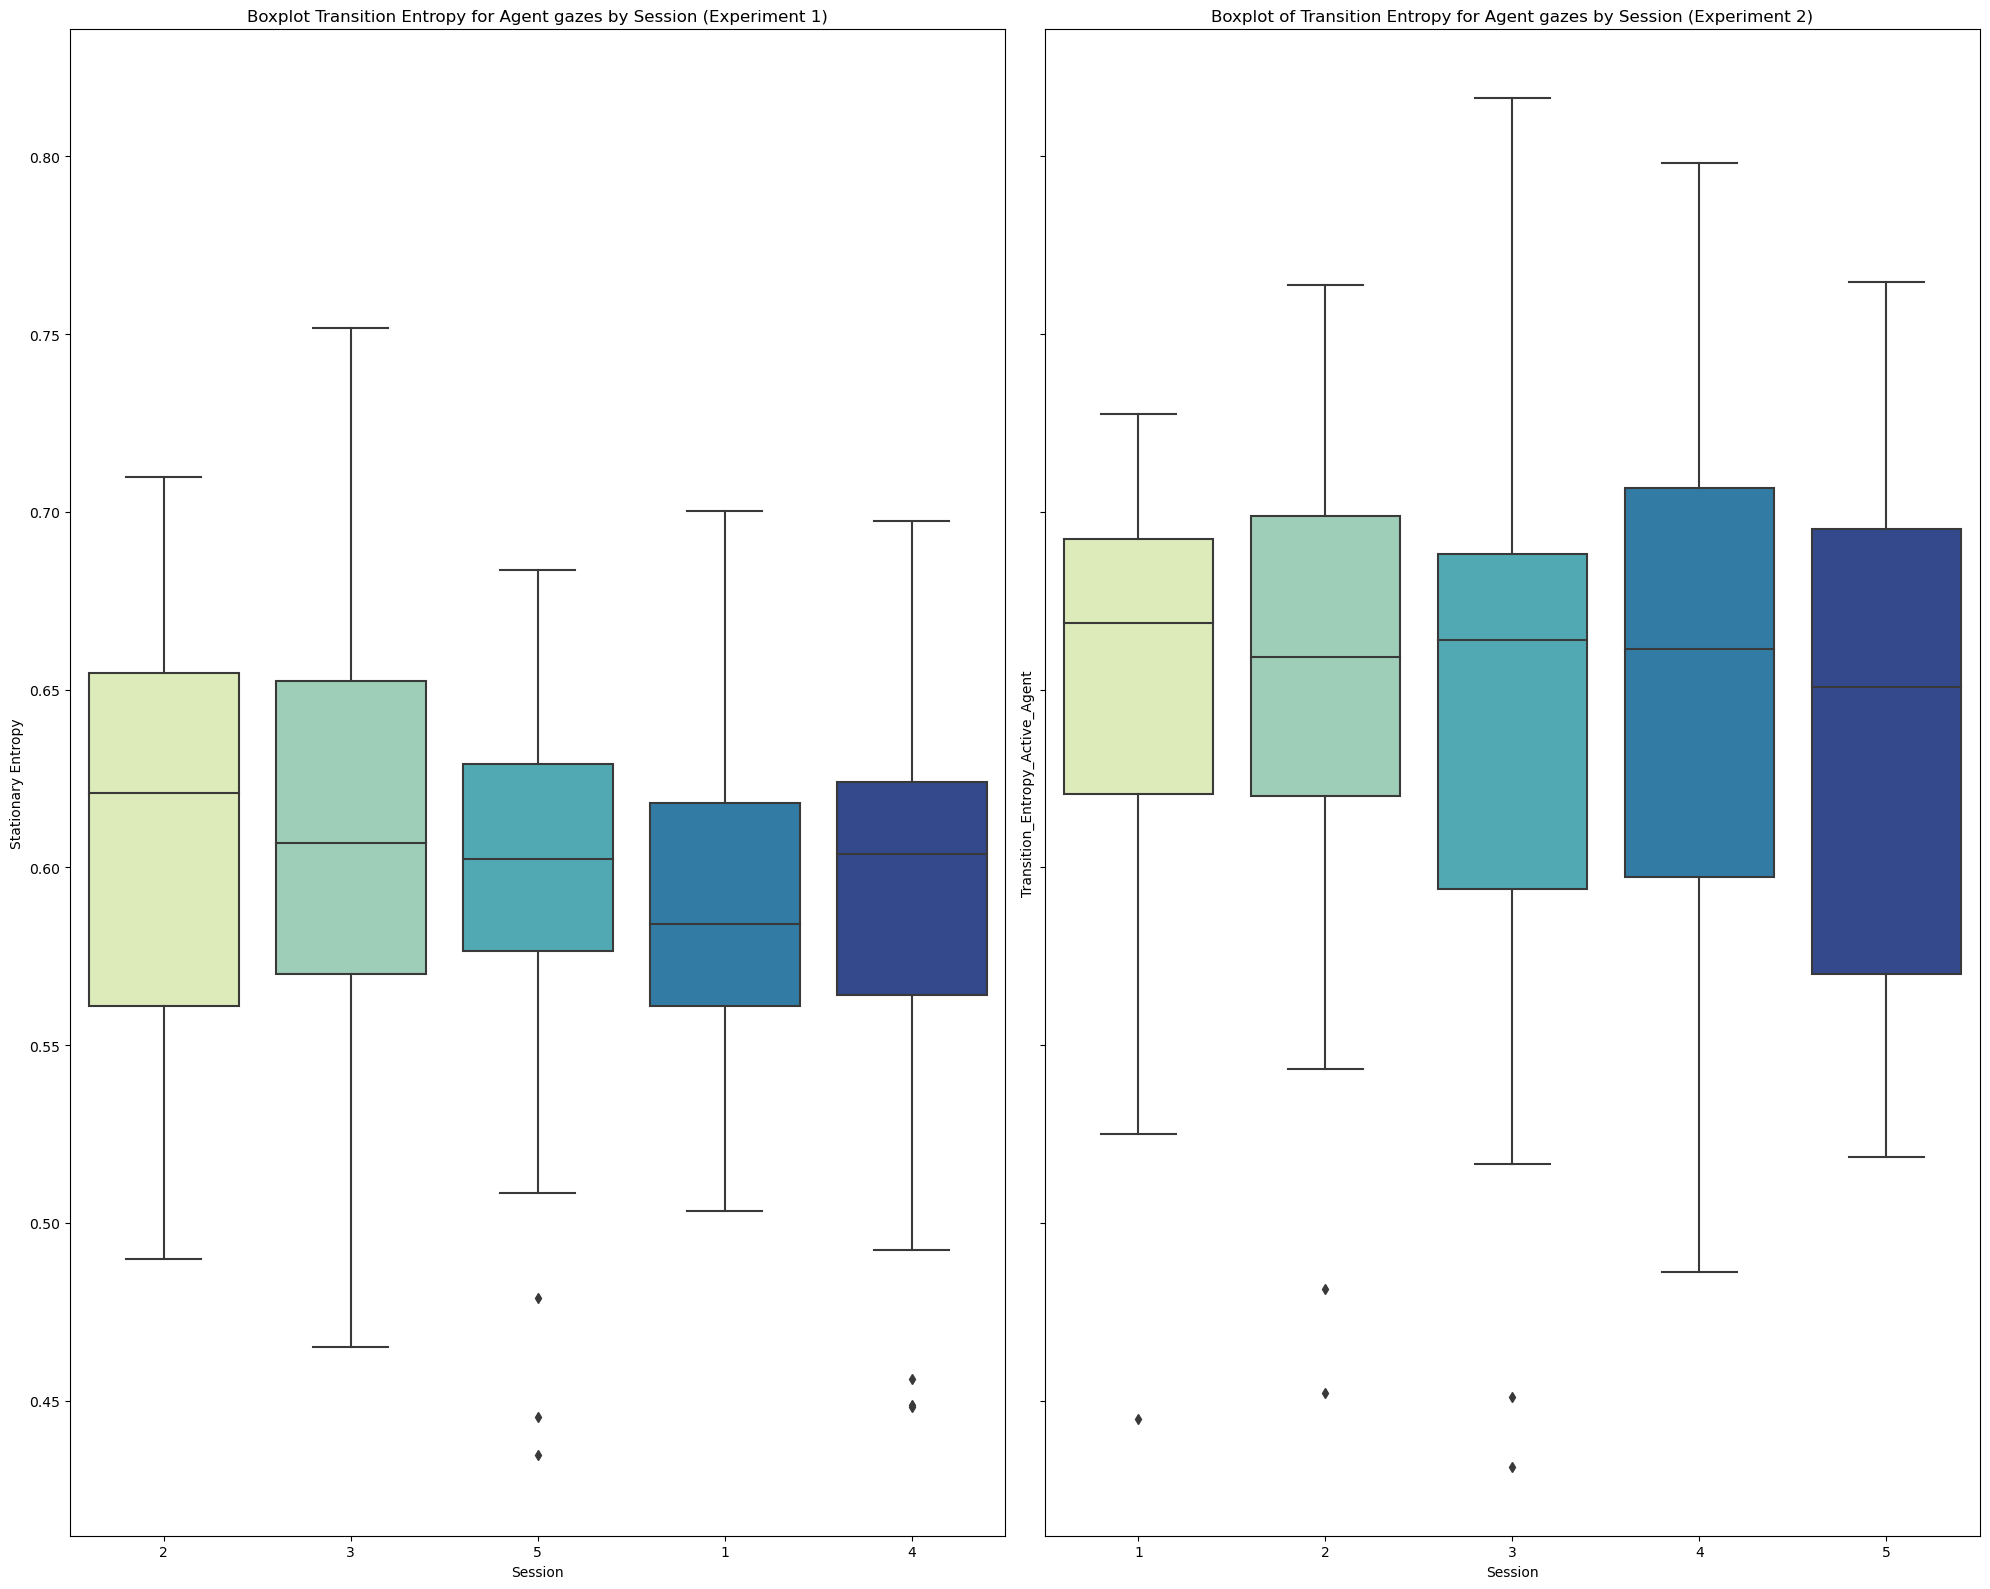

In [5]:
# Generate color lists from YlGnBu palette based on the number of unique sessions
num_sessions_1 = data_1['SessionNr'].nunique()
num_sessions_2 = data_2['SessionNr'].nunique()
palette = sns.color_palette("YlGnBu", max(num_sessions_1, num_sessions_2))

# Create subplots for side-by-side boxplots
fig, axes = plt.subplots(1, 2, figsize=(20, 16), sharey=True)

# Boxplot for Experiment 1
sns.boxplot(data=data_1, x='SessionNr', y='Transition_Entropy_Active_Agent', ax=axes[0], palette=palette[:num_sessions_1])
axes[0].set_title("Boxplot Transition Entropy for Agent gazes by Session (Experiment 1)")
axes[0].set_xlabel("Session")
axes[0].set_ylabel("Stationary Entropy")

# Boxplot for Experiment 2
sns.boxplot(data=data_2, x='SessionNr', y='Transition_Entropy_Active_Agent', ax=axes[1], palette=palette[:num_sessions_2])
axes[1].set_title("Boxplot of Transition Entropy for Agent gazes by Session (Experiment 2)")
axes[1].set_xlabel("Session")

plt.tight_layout()
plt.show()


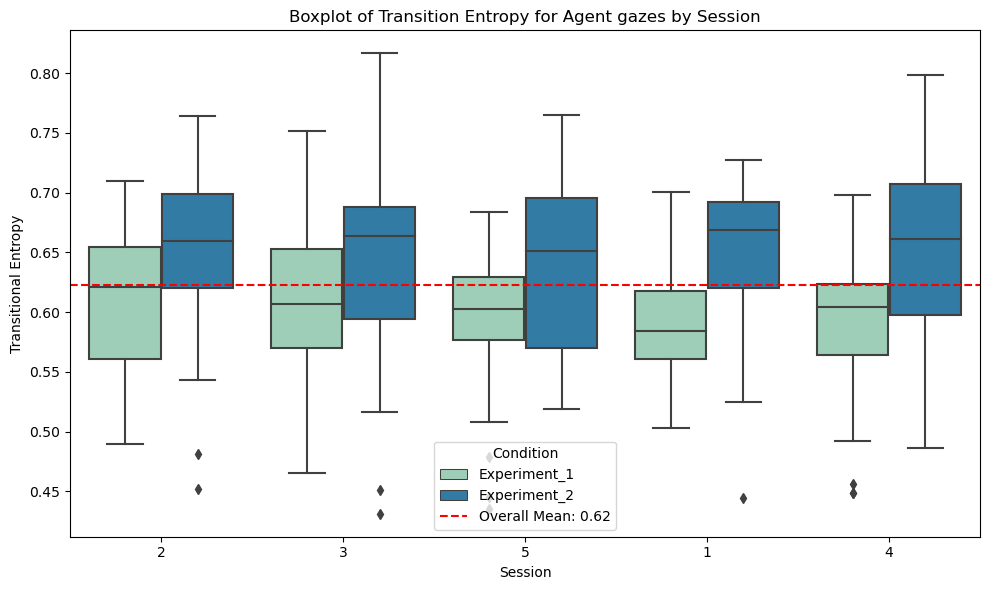

In [6]:
# Assuming data_1 and data_2 are already defined DataFrames for Experiment 1 and 2
# Add a column to each DataFrame to identify the experiment
data_1['Experiment'] = 'Experiment_1'
data_2['Experiment'] = 'Experiment_2'

# Concatenate the two DataFrames
combined_data = pd.concat([data_1, data_2])

# Number of unique sessions in both experiments
num_sessions_1 = data_1['SessionNr'].nunique()
num_sessions_2 = data_2['SessionNr'].nunique()

# Generate a palette with two colors, one for each experiment
experiment_palette = sns.color_palette("YlGnBu", 2)

# Calculate the overall mean of Transition_Entropy_Active_Agent
overall_mean = combined_data['Transition_Entropy_Active_Agent'].mean()

# Plotting combined boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data, x='SessionNr', y='Transition_Entropy_Active_Agent', hue='Experiment', palette=experiment_palette)

# Add a red horizontal line for the overall mean
plt.axhline(overall_mean, color='red', linestyle='--', linewidth=1.5, label=f'Overall Mean: {overall_mean:.2f}')

# Set labels and title
plt.title("Boxplot of Transition Entropy for Agent gazes by Session")
plt.xlabel("Session")
plt.ylabel("Transitional Entropy")
plt.legend(title="Condition")
plt.tight_layout()
plt.show()

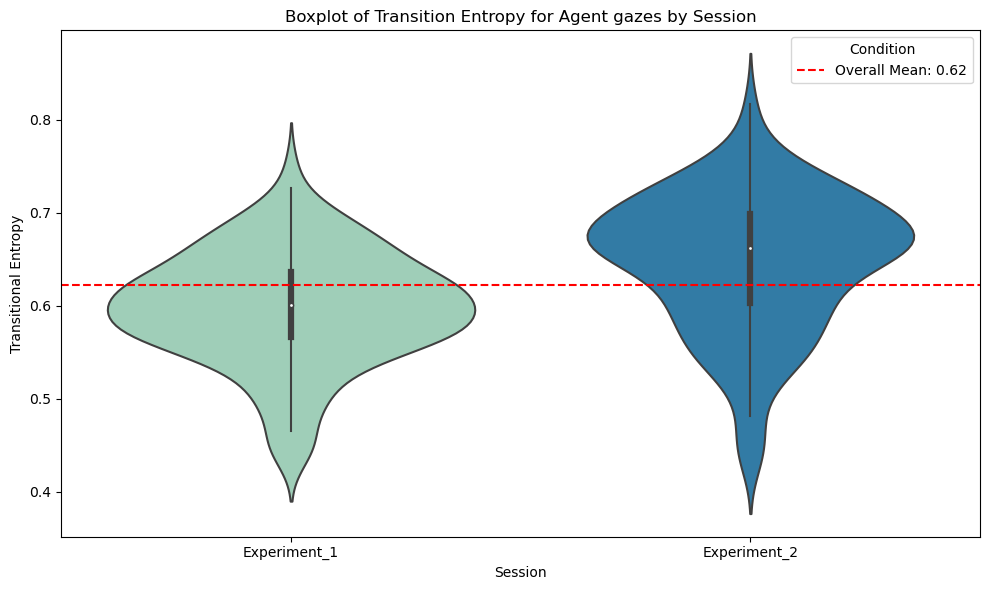

In [15]:
# Assuming data_1 and data_2 are already defined DataFrames for Experiment 1 and 2
# Add a column to each DataFrame to identify the experiment
data_1['Experiment'] = 'Experiment_1'
data_2['Experiment'] = 'Experiment_2'

# Concatenate the two DataFrames
combined_data = pd.concat([data_1, data_2])

# Number of unique sessions in both experiments
num_sessions_1 = data_1['SessionNr'].nunique()
num_sessions_2 = data_2['SessionNr'].nunique()

# Generate a palette with two colors, one for each experiment
experiment_palette = sns.color_palette("YlGnBu", 2)

# Calculate the overall mean of Transition_Entropy_Active_Agent
overall_mean = combined_data['Transition_Entropy_Active_Agent'].mean()

# Plotting combined boxplot
plt.figure(figsize=(10, 6))
sns.violinplot(data=combined_data, x='Experiment', y='Transition_Entropy_Active_Agent',  palette=experiment_palette)

# Add a red horizontal line for the overall mean
plt.axhline(overall_mean, color='red', linestyle='--', linewidth=1.5, label=f'Overall Mean: {overall_mean:.2f}')

# Set labels and title
plt.title("Boxplot of Transition Entropy for Agent gazes by Session")
plt.xlabel("Session")
plt.ylabel("Transitional Entropy")
plt.legend(title="Condition")
plt.tight_layout()
plt.show()

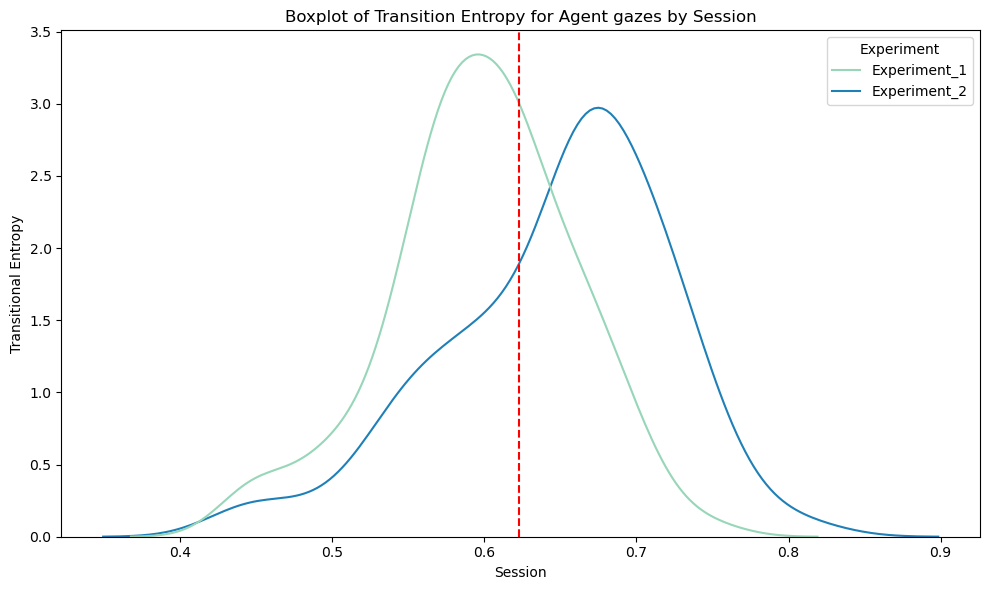

In [24]:
# Assuming data_1 and data_2 are already defined DataFrames for Experiment 1 and 2
# Add a column to each DataFrame to identify the experiment
data_1['Experiment'] = 'Experiment_1'
data_2['Experiment'] = 'Experiment_2'

# Concatenate the two DataFrames
combined_data = pd.concat([data_1, data_2])

# Number of unique sessions in both experiments
num_sessions_1 = data_1['SessionNr'].nunique()
num_sessions_2 = data_2['SessionNr'].nunique()

# Generate a palette with two colors, one for each experiment
experiment_palette = sns.color_palette("YlGnBu", 2)

# Calculate the overall mean of Transition_Entropy_Active_Agent
overall_mean = combined_data['Transition_Entropy_Active_Agent'].mean()

# Plotting combined boxplot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=combined_data, hue='Experiment', x='Transition_Entropy_Active_Agent',  palette=experiment_palette)

# Add a red horizontal line for the overall mean
plt.axvline(overall_mean, color='red', linestyle='--', linewidth=1.5, label=f'Overall Mean: {overall_mean:.2f}')

# Set labels and title
plt.title("Boxplot of Transition Entropy for Agent gazes by Session")
plt.xlabel("Session")
plt.ylabel("Transitional Entropy")
#plt.legend(title="Experiment")
plt.tight_layout()
plt.show()

In [7]:
Coverage =  pd.read_csv('/Volumes/TwoTeras/Graph_Stuff/CSVs/Unique_NodeVisit_Ratios.csv')
# Force 'ParticipantID' to have 4 digits as a string
Coverage['ParticipantID'] = Coverage['ParticipantID'].apply(lambda x: f"{int(x):04d}")
display(Coverage.info())

Navigation = pd.read_csv("/Volumes/TwoTeras/Resources/Conservative_Explorative.csv", sep =",")
Navigation.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ParticipantID         345 non-null    object 
 1   SessionNr             345 non-null    int64  
 2   IndividualNodeCount   345 non-null    int64  
 3   Experiment            345 non-null    object 
 4   CummulativeNodeCount  345 non-null    int64  
 5   IndividualRatio       345 non-null    float64
 6   CummulativeRatio      345 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 19.0+ KB


None

,ParticipantId,Session,StrategyCount,StrategyPerc,Strategy,Decision,Total,Experiment
0,1754,1,7.0,0.22,Conservative,AgentAtChosen,32.0,Exp1
1,1754,1,25.0,0.78,Explorative,AgentAtChosen,32.0,Exp1
2,1754,1,6.0,0.24,Conservative,AgentAtNotChosen,25.0,Exp1
3,1754,1,19.0,0.76,Explorative,AgentAtNotChosen,25.0,Exp1
4,1754,1,2.0,0.12,Conservative,AgentAtBoth,17.0,Exp1


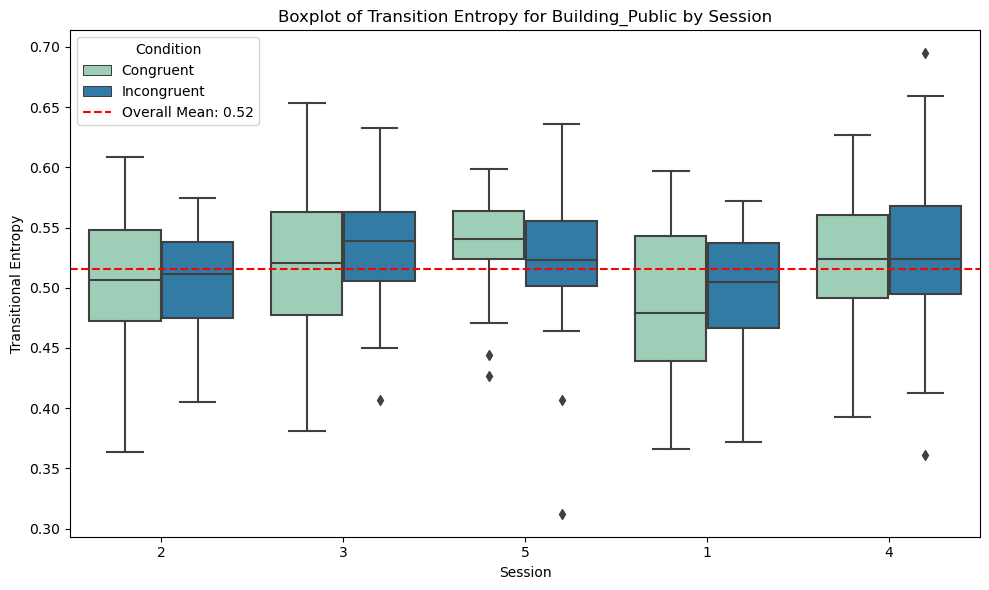

In [8]:
# Assuming data_1 and data_2 are already defined DataFrames for Experiment 1 and 2
# Add a column to each DataFrame to identify the experiment
data_1['Condition'] = 'Congruent'
data_2['Condition'] = 'Incongruent'

# Concatenate the two DataFrames
combined_data = pd.concat([data_1, data_2])

# Number of unique sessions in both experiments
num_sessions_1 = data_1['SessionNr'].nunique()
num_sessions_2 = data_2['SessionNr'].nunique()

# Generate a palette with two colors, one for each experiment
experiment_palette = sns.color_palette("YlGnBu", 2)

# Calculate the overall mean of Transition_Entropy_Active_Agent
overall_mean = combined_data['Transition_Entropy_TaskBuilding_Public'].mean()

# Plotting combined boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data, x='SessionNr', y='Transition_Entropy_TaskBuilding_Public', hue='Condition', palette=experiment_palette)

# Add a red horizontal line for the overall mean
plt.axhline(overall_mean, color='red', linestyle='--', linewidth=1.5, label=f'Overall Mean: {overall_mean:.2f}')

# Set labels and title
plt.title("Boxplot of Transition Entropy for Building_Public by Session")
plt.xlabel("Session")
plt.ylabel("Transitional Entropy")
plt.legend(title="Condition")
plt.tight_layout()
plt.show()

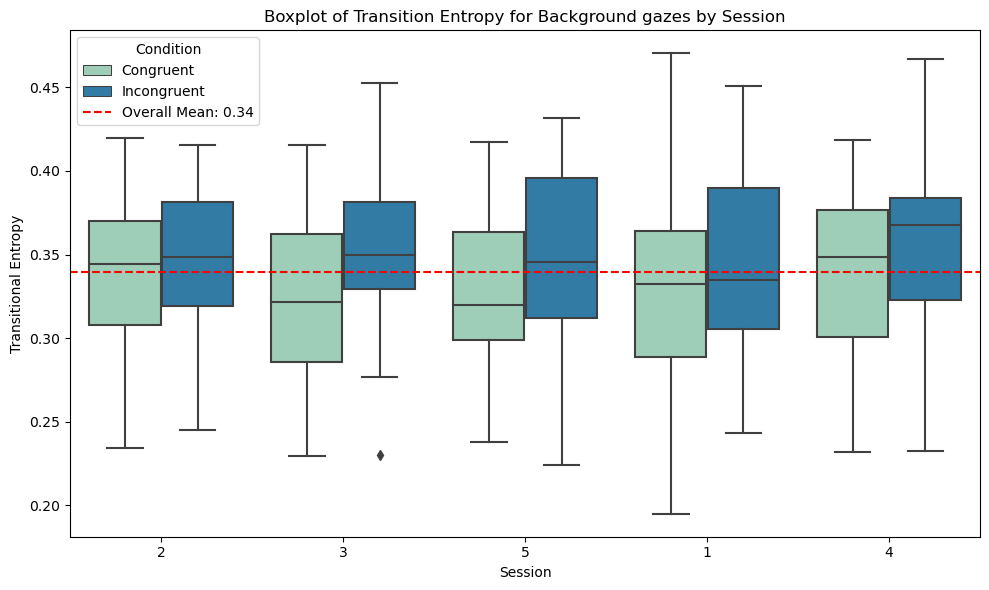

In [9]:
# Assuming data_1 and data_2 are already defined DataFrames for Experiment 1 and 2
# Add a column to each DataFrame to identify the experiment
data_1['Condition'] = 'Congruent'
data_2['Condition'] = 'Incongruent'

# Concatenate the two DataFrames
combined_data = pd.concat([data_1, data_2])

# Number of unique sessions in both experiments
num_sessions_1 = data_1['SessionNr'].nunique()
num_sessions_2 = data_2['SessionNr'].nunique()

# Generate a palette with two colors, one for each experiment
experiment_palette = sns.color_palette("YlGnBu", 2)

# Calculate the overall mean of Transition_Entropy_Active_Agent
overall_mean = combined_data['Transition_Entropy_Background'].mean()

# Plotting combined boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data, x='SessionNr', y='Transition_Entropy_Background', hue='Condition', palette=experiment_palette)

# Add a red horizontal line for the overall mean
plt.axhline(overall_mean, color='red', linestyle='--', linewidth=1.5, label=f'Overall Mean: {overall_mean:.2f}')

# Set labels and title
plt.title("Boxplot of Transition Entropy for Background gazes by Session")
plt.xlabel("Session")
plt.ylabel("Transitional Entropy")
plt.legend(title="Condition")
plt.tight_layout()
plt.show()

In [10]:
Navigation = pd.read_csv("/Volumes/TwoTeras/Resources/Conservative_Explorative.csv", sep =",")
Navigation_Explor = Navigation[Navigation.Strategy == "Explorative"]
Navigation_Explor_Agent = Navigation[(Navigation.Strategy == "Explorative") & (Navigation.Decision == "AgentAtChosen")]
Exploration = pd.DataFrame(Navigation_Explor.groupby(["ParticipantId", "Session"])["StrategyPerc"].mean())
Exploration.reset_index(inplace=True)
Exploration_Agent = pd.DataFrame(Navigation_Explor_Agent.groupby(["ParticipantId", "Session"])["StrategyPerc"].mean())
Exploration_Agent.reset_index(inplace=True)
Exploration_Complete = pd.merge(Exploration, Exploration_Agent, on=['ParticipantId', 'Session'])
Exploration_Complete.rename({"ParticipantId": 'ParticipantID', "Session": "SessionNr", "StrategyPerc_x": "Exploration_General", "StrategyPerc_y": "Exploration_Agent", }, axis=1, inplace=True)
Exploration_Complete['ParticipantID'] = Exploration_Complete['ParticipantID'].apply(lambda x: f"{int(x):04d}")
Exploration_Complete.head()

,ParticipantID,SessionNr,Exploration_General,Exploration_Agent
0,0365,1,0.600,0.58
1,0365,2,0.575,0.48
2,0365,3,0.410,0.27
3,0365,4,0.440,0.34
4,0365,5,0.460,0.37


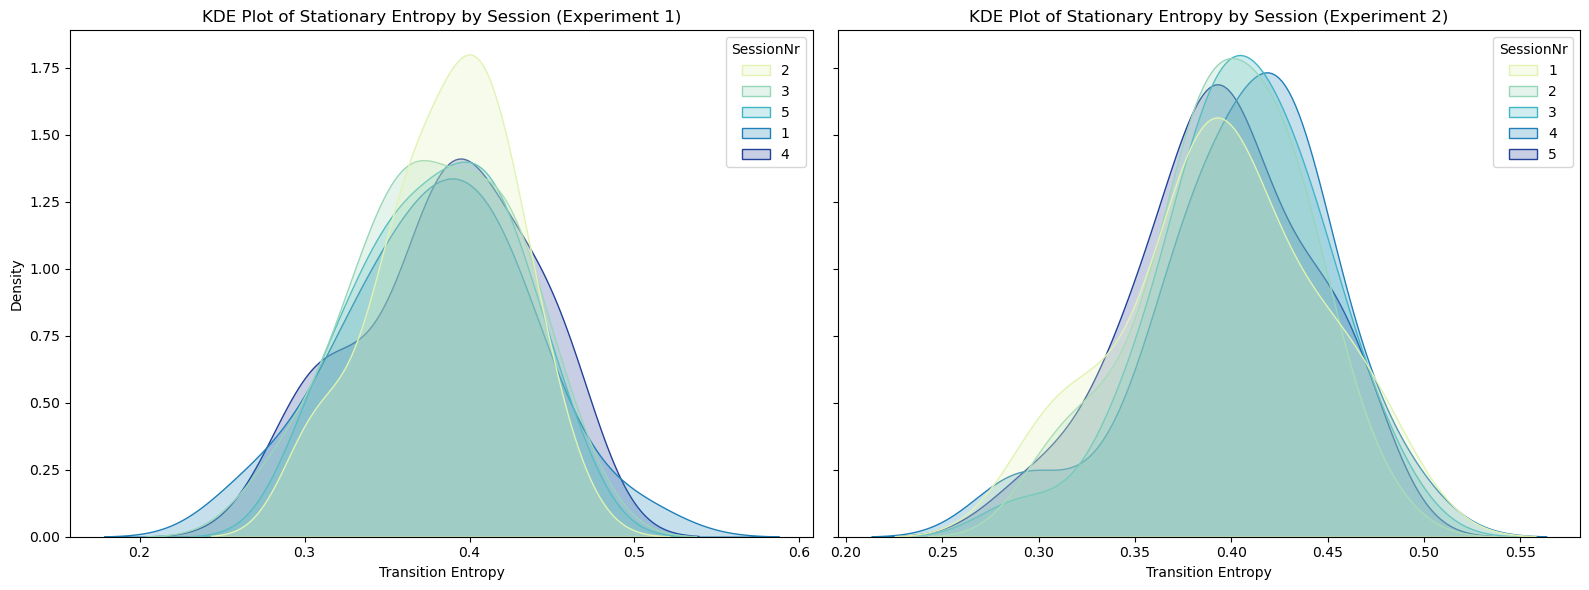

In [11]:
# Generate color lists from YlGnBu palette based on the number of unique sessions
num_sessions_1 = data_1['SessionNr'].nunique()
num_sessions_2 = data_2['SessionNr'].nunique()
palette = sns.color_palette("YlGnBu", max(num_sessions_1, num_sessions_2))

# Create subplots for side-by-side KDE plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# KDE for Experiment 1
sns.kdeplot(data=data_1, x='Overall_Transition_Entropy', hue='SessionNr', fill=True, ax=axes[0],
            palette=palette[:num_sessions_1])
axes[0].set_title("KDE Plot of Stationary Entropy by Session (Experiment 1)")
axes[0].set_xlabel("Transition Entropy")
axes[0].set_ylabel("Density")

# KDE for Experiment 2
sns.kdeplot(data=data_2, x='Overall_Transition_Entropy', hue='SessionNr', fill=True, ax=axes[1],
            palette=palette[:num_sessions_2])
axes[1].set_title("KDE Plot of Stationary Entropy by Session (Experiment 2)")
axes[1].set_xlabel("Transition Entropy")

plt.tight_layout()
plt.show()


In [ ]:
Corr = Exploration_Entropy[["Exploration_General", "Exploration_Agent", "Stationary_Entropy_Passive_Agent",  "Stationary_Entropy_Active_Agent"]].corr()
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(Corr, annot=True, cmap="coolwarm", square=True, cbar_kws={'shrink': .8}, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
plt.figure(figsize=(25,15))
sns.set(font_scale = 1.3)
sns.regplot(x='Stationary_Entropy_Active_Agent', y='Exploration_General',
                data=Exploration_Entropy)
sns.regplot(x='Stationary_Entropy_Active_Agent', y='Exploration_Agent',
                data=Exploration_Entropy)